In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
import pickle

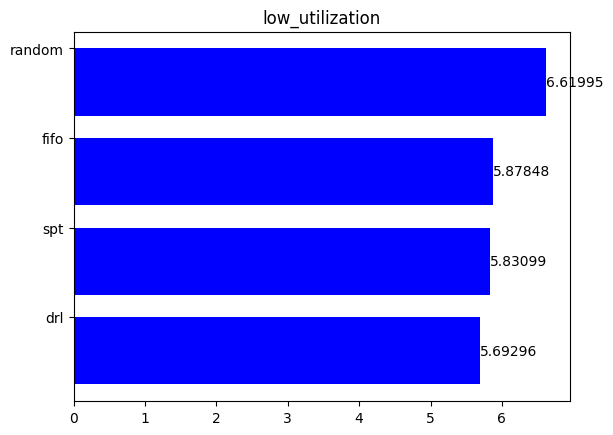

ppo 5.7 (0.09)
svfa 5.6 (0.08)
spt 5.8 (0.08)
fifo 5.9 (0.11)
random 6.6 (0.14)
RLRAM 1011.8 (14.15)
DDQN 2383.5 (18.75)
Park and song 6.0 (0.09)


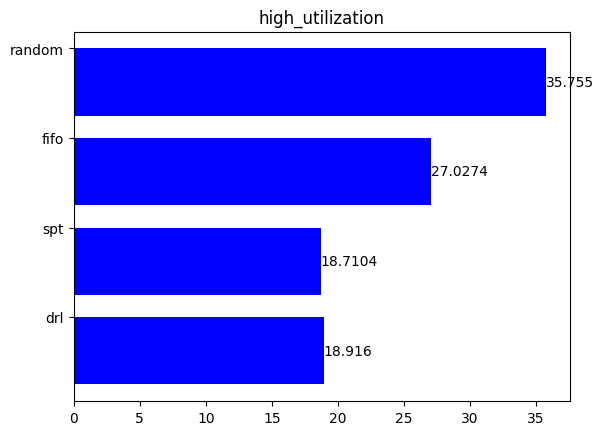

ppo 18.9 (0.91)
svfa 18.1 (0.94)
spt 18.7 (0.89)
fifo 27.0 (2.77)
random 35.8 (4.2)
RLRAM 1481.0 (11.94)
DDQN 2501.2 (4.83)
Park and song 19.4 (1.01)


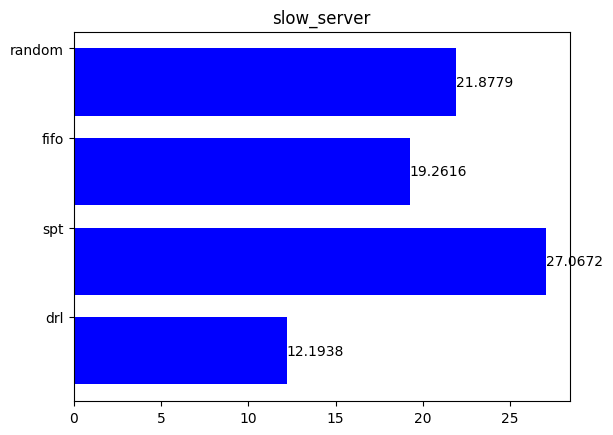

ppo 12.2 (0.38)
svfa 11.4 (0.31)
spt 27.1 (1.5)
fifo 19.3 (1.33)
random 21.9 (1.49)
RLRAM 1042.2 (13.62)
DDQN 58.9 (5.6)
Park and song 20.5 (1.26)


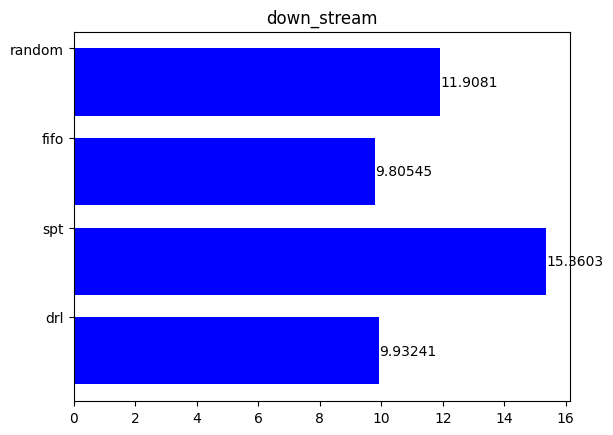

ppo 9.9 (0.33)
svfa 9.6 (0.25)
spt 15.4 (0.71)
fifo 9.8 (0.35)
random 11.9 (0.53)
RLRAM 1274.0 (12.38)
DDQN 2499.9 (6.51)
Park and song 14.7 (0.59)


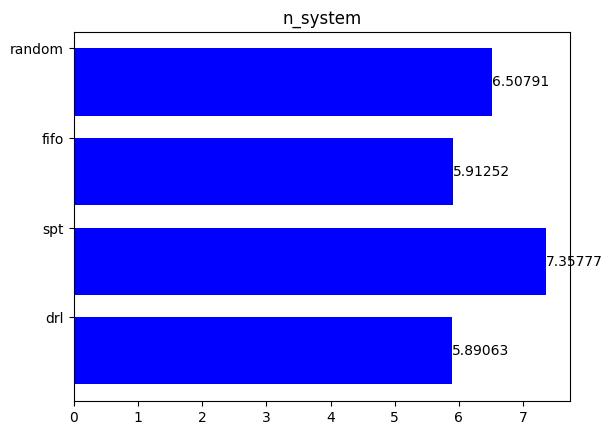

ppo 5.9 (0.11)
svfa 5.7 (0.09)
spt 7.4 (0.2)
fifo 5.9 (0.11)
random 6.5 (0.16)
RLRAM 19.1 (0.35)
DDQN 6.7 (0.11)
Park and song 6.3 (0.14)


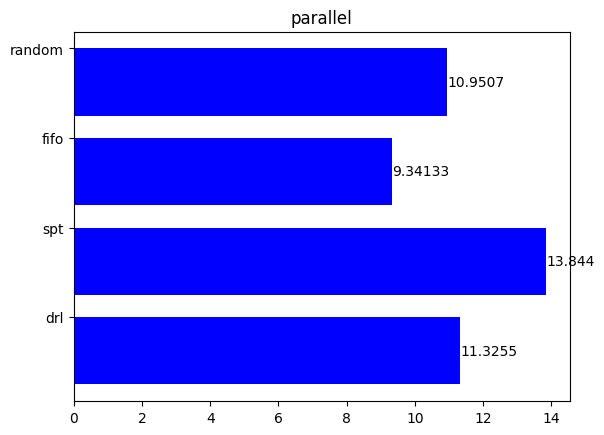

ppo 11.3 (0.38)
svfa 12.0 (0.38)
spt 13.8 (0.57)
fifo 9.3 (0.31)
random 11.0 (0.45)
RLRAM 1033.4 (10.06)
DDQN 2495.9 (5.45)
Park and song 13.7 (0.6)


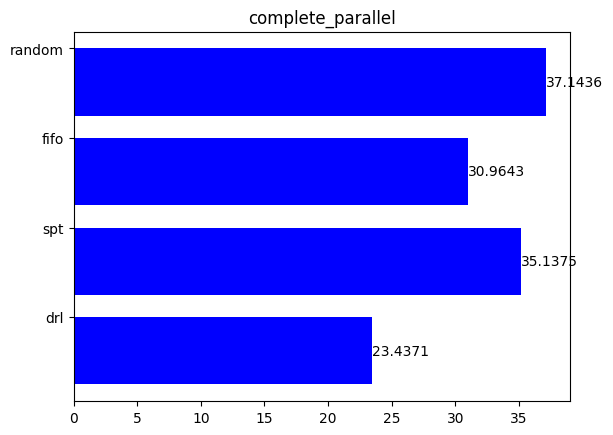

ppo 23.4 (0.92)
svfa 34.1 (1.29)
spt 35.1 (1.73)
fifo 31.0 (2.54)
random 37.1 (2.6)
RLRAM 1036.5 (12.37)
DDQN 2504.8 (5.29)


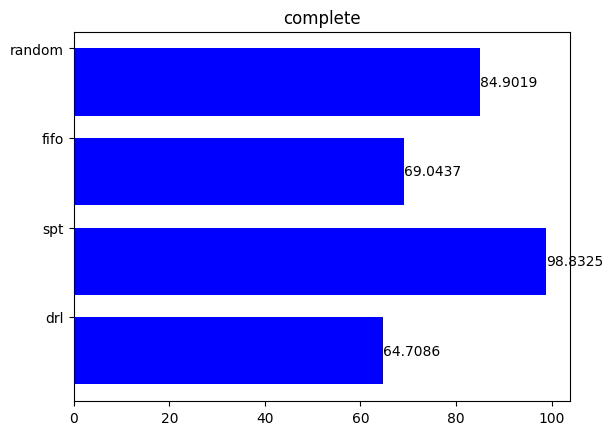

ppo 64.7 (2.63)
svfa 72.1 (2.34)
spt 98.8 (3.8)
fifo 69.0 (3.36)
random 84.9 (4.0)
RLRAM 1432.5 (12.73)
DDQN 2502.6 (6.25)


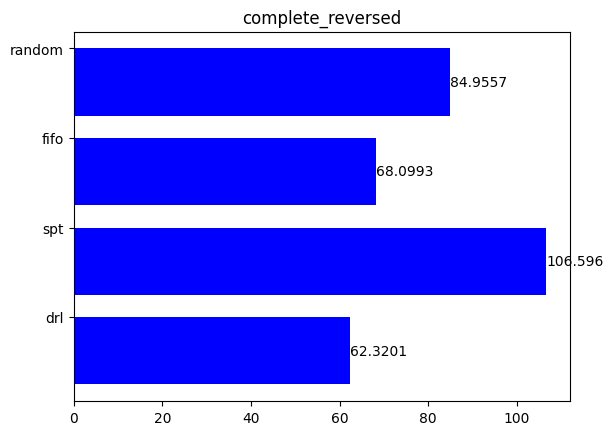

ppo 62.3 (1.77)
svfa 73.6 (2.44)
spt 106.6 (5.18)
fifo 68.1 (2.61)
random 85.0 (4.74)
RLRAM 1307.3 (11.16)
DDQN 2498.4 (6.16)


In [24]:
with open(f'results_svfa/raw_res.pkl', 'rb') as f:
    svfa_all = pickle.load(f)

for model_name in ['low_utilization', 'high_utilization', 'slow_server', 'down_stream', 'n_system', 'parallel', 'complete_parallel', 'complete', 'complete_reversed']:#, 'complete', 'complete_reversed', 'complete_parallel']:
    if model_name not in ['n_system']:#['complete', 'complete_reversed']:
        drl = pd.read_csv(f'results/PPOPlanner_{model_name}.txt')['mean_cycle_time']
    else:
        drl = pd.read_csv(f'results/PPOPlanner_penalty_{model_name}.txt')['mean_cycle_time']
    if model_name != 'low_utilization':
        svfa = svfa_all[model_name]
    else:
        svfa = svfa_all['low_utilitzation']
    spt = pd.read_csv(f'results/ShortestProcessingTime_{model_name}.txt')['mean_cycle_time']
    fifo = pd.read_csv(f'results/FIFO_{model_name}.txt')['mean_cycle_time']
    random = pd.read_csv(f'results/Random_{model_name}.txt')['mean_cycle_time']

    
    dqn = pd.read_csv(f'results/DDQN_{model_name}.txt')['mean_cycle_time']
    rlram = pd.read_csv(f'results/RLRAM_{model_name}.txt')['mean_cycle_time']
    
    labels = ['drl', 'spt', 'fifo', 'random']
    data = [drl.mean(), spt.mean(), fifo.mean(), random.mean()]
    
    fig, ax = plt.subplots()    
    width = 0.75 # the width of the bars 
    ind = np.arange(len(data))  # the x locations for the groups
    bars = ax.barh(ind, data, width, color="blue")
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(labels, minor=False)
    plt.title(model_name)


    ax.bar_label(bars)  
    plt.show()

    print('ppo', f'{np.round(np.mean(drl),1)} ({np.round(1.96*(np.std(drl)/np.sqrt(len(drl))),2)})')
    print('svfa', f'{np.round(np.mean(svfa),1)} ({np.round(1.96*(np.std(svfa)/np.sqrt(len(svfa))),2)})')
    print('spt', f'{np.round(np.mean(spt),1)} ({np.round(1.96*(np.std(spt)/np.sqrt(len(spt))),2)})')
    print('fifo', f'{np.round(np.mean(fifo),1)} ({np.round(1.96*(np.std(fifo)/np.sqrt(len(fifo))),2)})')
    print('random', f'{np.round(np.mean(random),1)} ({np.round(1.96*(np.std(random)/np.sqrt(len(random))),2)})')
    print('RLRAM', f'{np.round(np.mean(rlram),1)} ({np.round(1.96*(np.std(rlram)/np.sqrt(len(rlram))),2)})') 
    print('DDQN', f'{np.round(np.mean(dqn),1)} ({np.round(1.96*(np.std(dqn)/np.sqrt(len(dqn))),2)})')
    if model_name not in ['complete', 'complete_reversed', 'complete_parallel']:
        parkSong = pd.read_csv(f'results/ParkSong_{model_name}.txt')['mean_cycle_time']
        print('Park and song', f'{np.round(np.mean(parkSong),1)} ({np.round(1.96*(np.std(parkSong)/np.sqrt(len(parkSong))),2)})') 
    
    
    #plt.show()






In [25]:
with open(f'results_svfa/raw_res.pkl', 'rb') as f:
    svfa_all = pickle.load(f)
svfa_all.keys()

dict_keys(['n_system', 'parallel', 'low_utilitzation', 'down_stream', 'complete_parallel', 'slow_server', 'complete', 'high_utilization', 'complete_reversed'])

In [26]:
from scipy import stats
#for model_name in ['n_system', 'down_stream', 'high_utilization', 'low_utilization', 'slow_server', 'parallel', 'complete', 'complete_reversed', 'complete_parallel']:

model_name = 'complete_reversed'
if model_name not in ['n_system']:#['complete', 'complete_reversed']:
    drl = pd.read_csv(f'results/PPOPlanner_{model_name}.txt')['mean_cycle_time']
else:
    drl = pd.read_csv(f'results/PPOPlanner_penalty_{model_name}.txt')['mean_cycle_time']
    
with open(f'results_svfa/raw_res.pkl', 'rb') as f:
    svfa_all = pickle.load(f)

if model_name != 'low_utilization':
    svfa = svfa_all[model_name]
else:
    svfa = svfa_all['low_utilitzation']
spt = pd.read_csv(f'results/ShortestProcessingTime_{model_name}.txt')['mean_cycle_time']
fifo = pd.read_csv(f'results/FIFO_{model_name}.txt')['mean_cycle_time']
random = pd.read_csv(f'results/Random_{model_name}.txt')['mean_cycle_time']
if model_name not in ['complete', 'complete_reversed', 'complete_parallel']:
    parkSong = pd.read_csv(f'results/ParkSong_{model_name}.txt')['mean_cycle_time']


models = [drl, fifo]
print(np.mean(models[0]), np.mean(models[1]))
stats.ttest_ind(models[0], models[1])  

62.32012577272285 68.0992746353336


TtestResult(statistic=-3.5734156703918996, pvalue=0.00044255136906405076, df=198.0)